In [1]:
import numpy as np
import matplotlib.pyplot as plt

import utils.visualize as viz
from utils.ode import map_equation, hydrogen_bromine, hydrogen_bromine_init

%load_ext autoreload
%autoreload 2

In [2]:
dt = 0.002
visualize = viz.ODEResultVisualizer(
    fun=hydrogen_bromine,
    x0=hydrogen_bromine_init,
    t=np.arange(0, 1e1, dt),
    result_dir="../experiments/results/hbr_20251006-202655",
    labels=["Br2", "Br", "H2", "H", "HBr", "M"],
)
visualize.solve()

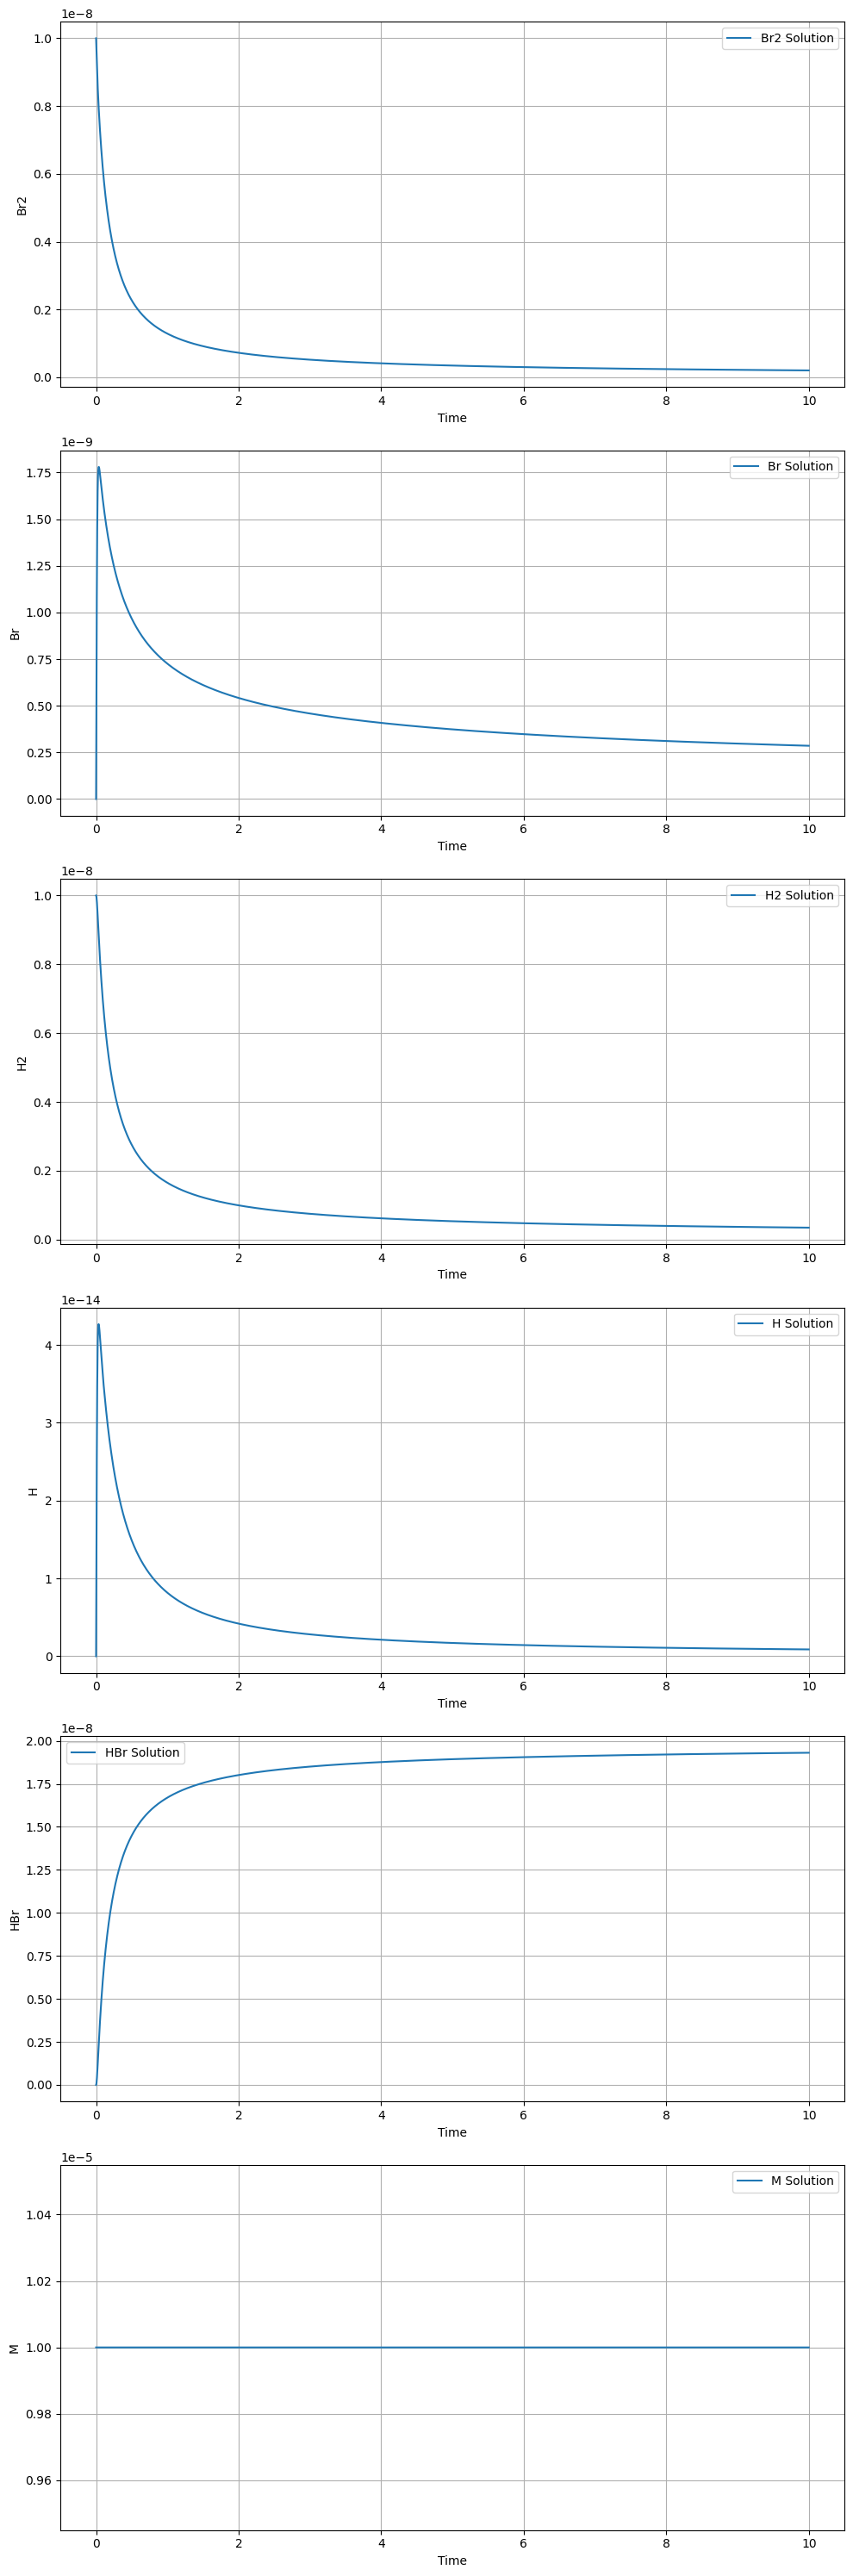

In [3]:
visualize.plot_solution()

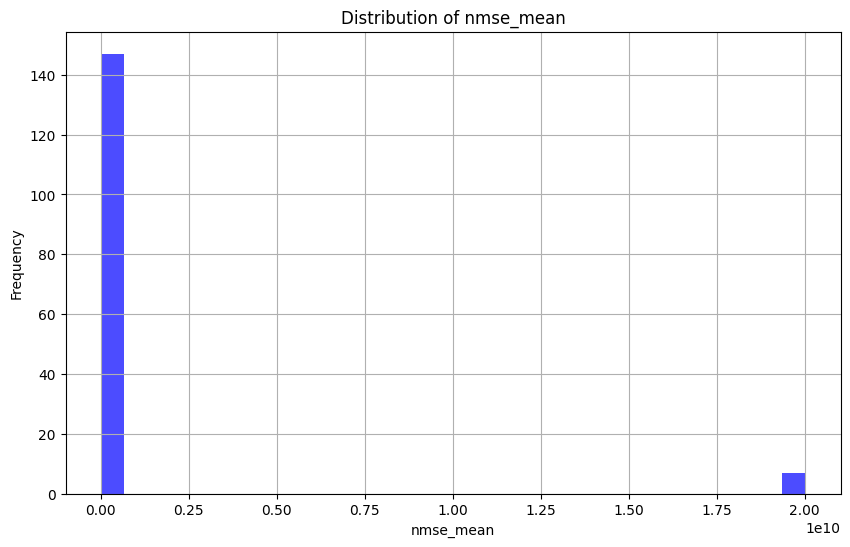

In [4]:
visualize.plot_metric_distribution('nmse_mean')

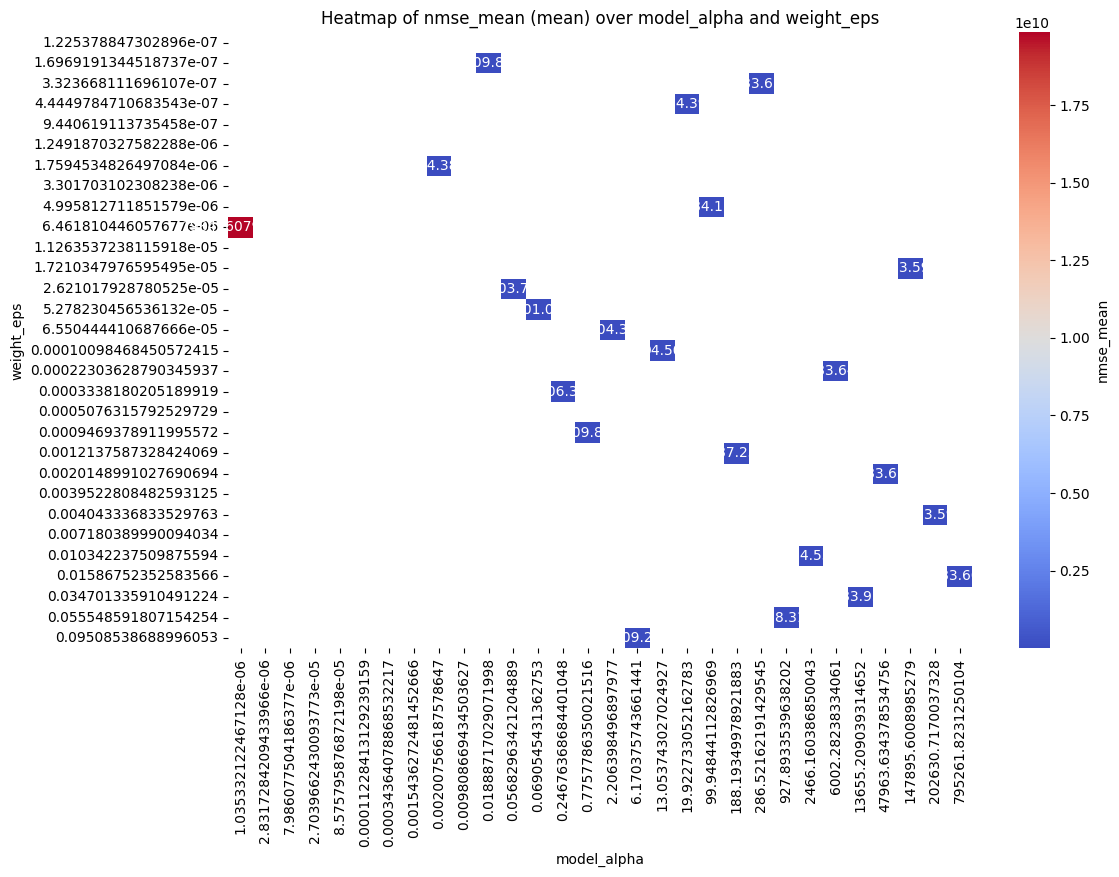

In [5]:
visualize.plot_parameter_heatmap(
    param_x="model_alpha",
    param_y="weight_eps",
    metric="nmse_mean",
    fixed_params={'weight_std': 0},
    save=True
)

In [6]:
df = visualize.results_df
df.to_csv('temp_data.csv', index=False)

In [7]:
visualize.get_best_model('nmse_mean', fixed_params={'weight_std': 0})

model                          21_model
nmse_0                         2.855791
nmse_1                        184.57554
nmse_2                        10.509178
nmse_3                       246.775106
nmse_4                          1.54494
nmse_5                              0.0
nmse_mean                     74.376759
data_file      hydrogen_bromine_ode.csv
equation               hydrogen_bromine
model_alpha                    0.002008
weight_eps                     0.000002
weight_std                          0.0
Name: 112, dtype: object

ValueError: x and y must have same first dimension, but have shapes (5000,) and (22,)

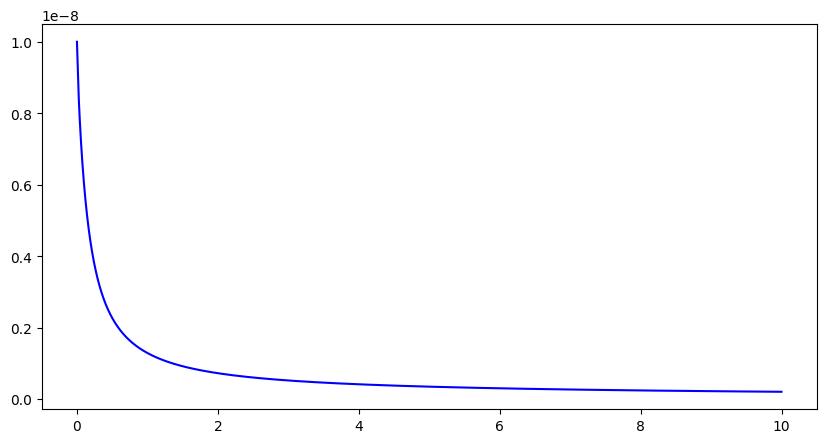

In [19]:
# visualize.plot_best_model_solution('nmse_mean', fixed_params={'weight_std': 0})
model = "21_model"
visualize.plot_model_solution(model, save=False)

In [ ]:
# visualize.plot_best_model_coefficients('nmse_mean', fixed_params={'weight_std': 0})
visualize.plot_coefficients(model, save=False)